In [63]:
!pip install mplcyberpunk

In [64]:
!pip install yfinance==0.2.40

In [10]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk

In [11]:
tickers = ["^BVSP", "^GSPC", "BRL=X"]

In [12]:
dados_mercado = yf.download(tickers, period = '6mo')
dados_mercado = dados_mercado["Adj Close"]
dados_mercado

[*********************100%%**********************]  3 of 3 completed


Ticker,BRL=X,^BVSP,^GSPC
Date,,,
2024-03-13,4.968700,128006.000000,NaN
2024-03-14,4.969200,127690.000000,5150.479980
2024-03-15,4.992700,126742.000000,5117.089844
2024-03-18,4.968047,126954.000000,5149.419922
2024-03-19,5.029400,127529.000000,5178.509766
...,...,...,...
2024-09-09,5.596600,134737.000000,5471.049805
2024-09-10,5.584300,134320.000000,5495.520020
2024-09-11,5.662900,134677.000000,5554.129883


In [13]:
dados_mercado = dados_mercado.dropna() 

dados_mercado

Ticker,BRL=X,^BVSP,^GSPC
Date,,,
2024-03-14,4.969200,127690.000000,5150.479980
2024-03-15,4.992700,126742.000000,5117.089844
2024-03-18,4.968047,126954.000000,5149.419922
2024-03-19,5.029400,127529.000000,5178.509766
2024-03-20,5.030000,129125.000000,5224.620117
...,...,...,...
2024-09-09,5.596600,134737.000000,5471.049805
2024-09-10,5.584300,134320.000000,5495.520020
2024-09-11,5.662900,134677.000000,5554.129883


In [14]:
dados_mercado.columns = ["DOLAR", "IBOVESPA", "S&P500"] 

dados_mercado

,DOLAR,IBOVESPA,S&P500
Date,,,
2024-03-14,4.969200,127690.000000,5150.479980
2024-03-15,4.992700,126742.000000,5117.089844
2024-03-18,4.968047,126954.000000,5149.419922
2024-03-19,5.029400,127529.000000,5178.509766
2024-03-20,5.030000,129125.000000,5224.620117
...,...,...,...
2024-09-09,5.596600,134737.000000,5471.049805
2024-09-10,5.584300,134320.000000,5495.520020
2024-09-11,5.662900,134677.000000,5554.129883


In [15]:
plt.style.use("cyberpunk") 

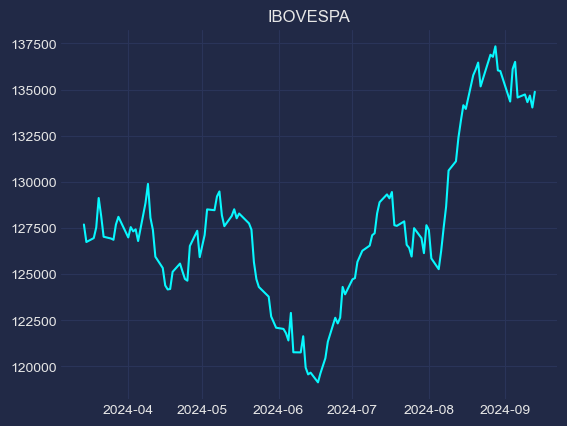

In [16]:
plt.plot(dados_mercado["IBOVESPA"])
plt.title("IBOVESPA") 

plt.savefig("ibovespa.png")

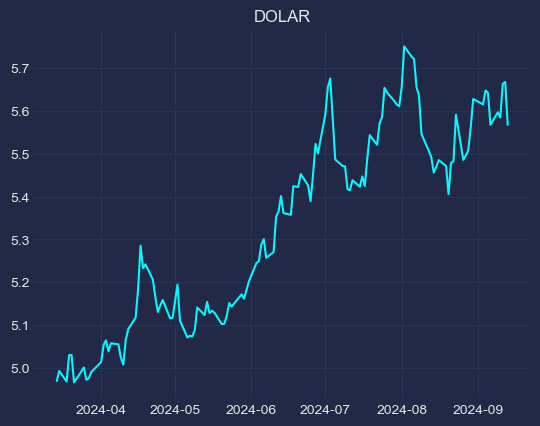

In [17]:
plt.plot(dados_mercado["DOLAR"])
plt.title("DOLAR") 

plt.savefig("dolar.png")

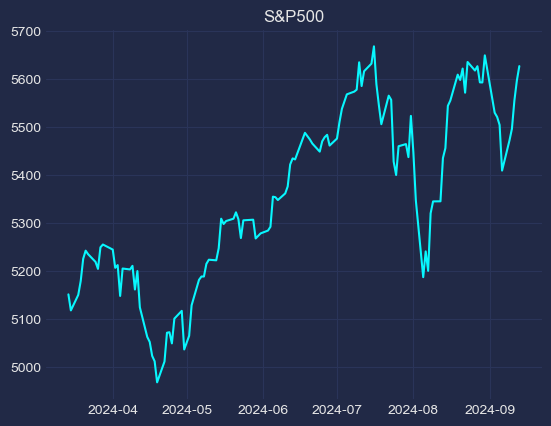

In [18]:
plt.plot(dados_mercado["S&P500"])
plt.title("S&P500") 

plt.savefig("sp500.png")

In [19]:
retornos_diarios = dados_mercado.pct_change() 

retornos_diarios

,DOLAR,IBOVESPA,S&P500
Date,,,
2024-03-14,NaN,NaN,NaN
2024-03-15,0.004729,-0.007424,-0.006483
2024-03-18,-0.004938,0.001673,0.006318
2024-03-19,0.012349,0.004529,0.005649
2024-03-20,0.000119,0.012515,0.008904
...,...,...,...
2024-09-09,0.005227,0.001226,0.011580
2024-09-10,-0.002198,-0.003095,0.004473
2024-09-11,0.014075,0.002658,0.010665


In [20]:
retorno_dolar = retornos_diarios["DOLAR"].iloc[-1]
retorno_ibovespa = retornos_diarios["IBOVESPA"].iloc[-1]
retorno_sp = retornos_diarios["S&P500"].iloc[-1]

In [21]:
retorno_dolar = str(round(retorno_dolar * 100, 2)) + "%" 

retorno_dolar

'-1.76%'

In [22]:
retorno_ibovespa = str(round(retorno_ibovespa * 100, 2)) + "%"
retorno_sp = str(round(retorno_sp * 100, 2)) + "%"

retorno_sp 

'0.54%'

In [23]:
retorno_ibovespa

'0.64%'

In [24]:
import win32com.client as win32 

In [25]:
outlook = win32.Dispatch("outlook.application") 

email = outlook.CreateItem(0)

In [81]:
email.To = "aaa@bbb.com.br"
email.Subject = "Relatório de Mercado"
email.Body = f'''Prezado diretor, segue o relatório de mercado:

* O Ibovespa teve o retorno de {retorno_ibovespa}.
* O Dólar teve o retorno de {retorno_dolar}.
* O S&P500 teve o retorno de {retorno_sp}.

Segue em anexo a peformance dos ativos nos últimos 5 anos.

Att,
Melhor estagiário do mundo!


''' 

anexo_ibovespa = r"C:\Users\VINICIUS\Downloads\ibovespa.png"
anexo_dolar = r"C:\Users\VINICIUS\Downloads\dolar.png"
anexo_sp = r"C:\Users\VINICIUS\Downloads\sp500.png" 

email.Attachments.Add(anexo_ibovespa)
email.Attachments.Add(anexo_dolar)
email.Attachments.Add(anexo_sp)

email.Send()